In [31]:
import control as ct
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

def plot_system(a = 1, b = 1):
    H_1 = signal.lti([0, 0, a**2], [1, b * a, a ** 2])
    H_2 = signal.lti([0, a, 0], [1, b * a, a ** 2])
    H_3 = signal.lti([1, 0, 0], [1, b * a, a ** 2])
    systems = [H_1, H_2, H_3]
    titles = ["H1", "H2", "H3"]

    # 4 rader med plots. 
    fig, axes = plt.subplots(4, 3, figsize=(15, 12))

    # Pol-noll
    for i, (sys, title) in enumerate(zip(systems, titles)):
        p = sys.poles
        z = sys.zeros
        axes[0, i].plot(p.real, p.imag, 'x', markersize=10, label='Poler', color='red')
        axes[0, i].plot(z.real, z.imag, 'o', markersize=10, label='Nollställen', color='blue')
        axes[0, i].legend()
        axes[0, i].set_title(f"Pol–noll karta för {title}")
        axes[0, i].grid(True, which="both", color='gainsboro')
        axes[0, i].axhline(0, linewidth=1, linestyle='-', color='dimgray')
        axes[0, i].axvline(0, linewidth=1, linestyle='-', color='dimgray')
        axes[0, i].set_xlabel("Re")
        axes[0, i].set_ylabel("Im")
    
    # Impulssvar
    ymin, ymax = 0.0, 0.0
    for i, (sys, title) in enumerate(zip(systems, titles)):
        t, y = signal.impulse(sys)
        axes[1, i].plot(t, y)
        axes[1, i].grid(True, which="both", color='gainsboro')
        axes[1, i].axhline(0, linewidth=1, linestyle='-', color='dimgray')
        axes[1, i].set_title(f"Impulssvar för {title}")
        axes[1, i].set_xlabel("Tid [s]")
        axes[1, i].set_ylabel("Amplitude")
        ymin = min(ymin, y.min())
        ymax = max(ymax, y.max())
        
    yr = max(abs(ymin), abs(ymax)) # matcha y-axeln (centrerad)
    for i in range(len(systems)):
        axes[1, i].set_ylim(-yr, yr)

    # Bode
    mag_min, mag_max, phase_min, phase_max = 0.0, 0.0, 0.0, 0.0
    for i, (sys, title) in enumerate(zip(systems, titles)):
        w, mag, phase = signal.bode(sys)

        ax_mag = axes[2, i]
        ax_mag.semilogx(w, mag)
        ax_mag.set_ylabel("Magnitude [dB]")
        ax_mag.set_xlabel("Frekvens [rad/s]")
        ax_mag.grid(True, which="both", color='gainsboro')
        ax_mag.axhline(0, linewidth=1, linestyle='-', color='dimgray')
        ax_mag.set_title(f"Bode (Magnitude) – {title}")
        mag_min = min(mag_min, mag.min())
        mag_max = max(mag_max, mag.max())
    
        ax_phase = axes[3, i]
        ax_phase.semilogx(w, phase, linestyle='--')
        ax_phase.set_ylabel("Fas [°]")
        ax_phase.set_xlabel("Frekvens [rad/s]")
        ax_phase.grid(True, which="both", color='gainsboro')
        ax_phase.axhline(0, linewidth=1, linestyle='-', color='dimgray')
        ax_phase.set_title(f"Bode (Fas) – {title}")
        phase_min = min(phase_min, phase.min())
        phase_max = max(phase_max, phase.max())

    mspan = max(1e-9, mag_max - mag_min); pspan = max(1e-9, phase_max - phase_min) # matcha y-axlar
    for i in range(len(systems)):
        axes[2, i].set_ylim(mag_min - 0.1*mspan, mag_max + 0.1*mspan)
        axes[3, i].set_ylim(phase_min - 0.1*pspan, phase_max + 0.1*pspan)

    plt.tight_layout()
    plt.show()

# Skapa interaktiva sliders
interact(plot_system,
         a=widgets.FloatSlider(value=1, min=0.001, max=2000, step=0.001),
         b=widgets.FloatSlider(value=1, min=0.001, max=100, step=0.001))


interactive(children=(FloatSlider(value=1.0, description='a', max=2000.0, min=0.001, step=0.001), FloatSlider(…

<function __main__.plot_system(a=1, b=1)>

## 4.
#### Pol–noll: vilken är H1, H2, H3?
   
Våra tre överföringsfunktioner

$H_1(s)=\dfrac{a^2}{s^2 + b a\,s + a^2},\quad H_2(s)=\dfrac{a\,s}{s^2 + b a\,s + a^2},\quad H_3(s)=\dfrac{s^2}{s^2 + b a\,s + a^2}$

**Poler** = rötter till nämnaren ⇒ lika i alla tre (det syns som samma två ”x” i diagrammen).

**Nollorna** = rötter till täljaren ⇒ här är de skillnad:
- H1 - inga nollställen
- H2 - ett nollställe i origo
- H3 - dubbelt nollställe i origo
  
I vår plott så ser vi inte skillnad på dubbel eller enkel nolla så H2 och H3 kan inte ensamt bestämmas av pol-noll plotten ⇒ Kollar på impulssaret

#### Impulssvar: hur skiljer man H2 från H3?
Använd initialvärdessatsen $h(0^+)=\lim_{s\to\infty} s\,H(s)$

- H2:  $\lim_{s\to\infty} sH_2(s)=\lim \frac{a s^2}{s^2 + b a\,s + a^2}=\lim \frac{a s^2}{s^2(1 + \frac{b a}{s} + \frac{a^2}{s^2})}=a$

Vilket vi ser i impulssvar plotten 2. Alltså måste H3 vara sista. 


#### Vilka parametrar som styr vilka egenskaper?
Varierar $a$: 
- Poler flyttas bort från origo
- Impulssvarets form är oförändrad men skalas
- Bode kurvan skjuts åt höger på frekvensaxeln

Varierar $b$:
- Påverkar om poolerna är reela eller inte: (se uppgift 6)
- Impulssvaret ändras genom mindre oscillastion
- Bode amplituden jämnas ut.
     
## 5.
H1 är ett LP-filter
H2 är ett BP-filter
H3 är ett HP-filter.

## 6.

6a: På papper.

6b:
Andra orning lågpass => H1

Vi vill ha resonanspeak på 10 dB vid 300 Hz.
Högre ska avta.

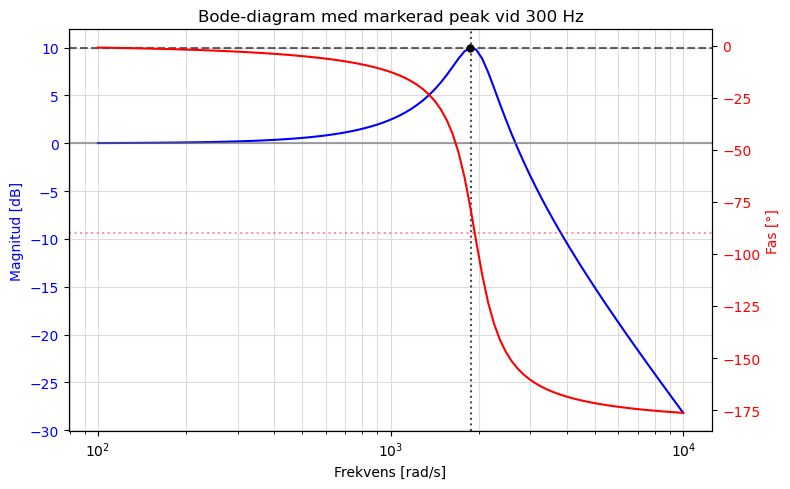

In [34]:

# Räcknas ut på papper. De här är bara en dubbelkoll.
a = 1.94e3
b = 0.32

# Rita Bode med markering vid 300 Hz
H_1 = signal.lti([0, 0, a**2], [1, b*a, a**2])
omega, mag, phase = signal.bode(H_1)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.semilogx(omega, mag, 'b')
ax1.set_xlabel("Frekvens [rad/s]")
ax1.set_ylabel("Magnitud [dB]", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, which='both', color='gainsboro')

# Linjer o markeringar
omega_p = 2*np.pi*300             # 300 Hz i rad/s
i_p = np.argmin(np.abs(omega - omega_p))
mag_p = mag[i_p]

ax1.axvline(omega_p, color='k', linestyle=':', alpha=0.7)            # vertikal vid 300 Hz
ax1.axhline(0, color='dimgray', linestyle='-', alpha=0.6)            # 0 dB-nivå
ax1.axhline(mag_p, color='k', linestyle='--', alpha=0.6)             # peak-nivå vid 300 Hz
ax1.plot(omega[i_p], mag_p, 'ko', ms=5)                              # punkt på peaken

# Fas
ax2 = ax1.twinx()
ax2.semilogx(omega, phase, 'r')
ax2.set_ylabel("Fas [°]", color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.axhline(-90, color='r', linestyle=':', alpha=0.4)                # referens -90°

plt.title("Bode-diagram med markerad peak vid 300 Hz")
plt.tight_layout()
plt.show()


## 7

Separat fil